In [5]:
import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

In [2]:
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = int((inputShape[2] - targetShape[2]) / 2)
        self.xstart = int((inputShape[3] - targetShape[3]) / 2)
        self.yend = self.ystart + height
        self.xend = self.xstart + width

        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]


In [3]:
# Loading the model

prototxt = "deploy.prototxt"
caffemodel = "hed_pretrained_bsds.caffemodel"
net = cv.dnn.readNetFromCaffe(prototxt, caffemodel)
cv.dnn_registerLayer('Crop', CropLayer)

In [4]:
# Reading the image 
path = "input.jpg"
width = 500
height = 500

image=cv.imread(path)
image=cv.resize(image,(width,height))

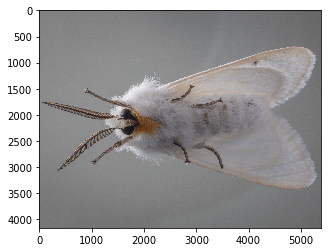

In [17]:
# Displaying the input image
pil_im = Image.open(path)
im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()


In [9]:
inp = cv.dnn.blobFromImage(image, scalefactor=1.0, size=(width, height),
                           mean=(104.00698793, 116.66876762, 122.67891434),
                           swapRB=False, crop=False)
net.setInput(inp)
# edges = cv.Canny(image,image.shape[1],image.shape[0])
out = net.forward()

out = out[0, 0]
out = cv.resize(out, (image.shape[1], image.shape[0]))


In [10]:
print(out.shape)

(500, 500)


In [11]:
out=cv.cvtColor(out,cv.COLOR_GRAY2BGR)
out = 255 * out
out = out.astype(np.uint8)

In [12]:
print(type(out))
print(np.max(out))
print(np.min(out))
print(out.shape)
print(image.shape)
con=np.concatenate((image,out),axis=1)
cv.imwrite('out.jpg',con)

<class 'numpy.ndarray'>
235
0
(500, 500, 3)
(500, 500, 3)


True

### Results 

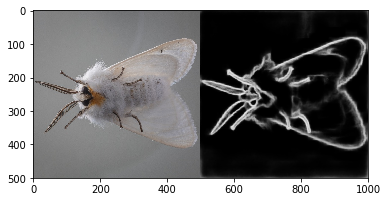

In [16]:
# Output

pil_im = Image.open("out.jpg")
im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()